<a href="https://colab.research.google.com/github/Aleena24/Predictive_Analysis/blob/main/Customer_Sales_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [11]:
df = pd.read_csv('/content/Retail.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Preprocessing


1.   Data Cleaning and Preparation





In [13]:
print(df.isnull().sum())
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.head()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom



2.   Descriptive statistics



In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')
print(df['InvoiceDate'].isnull().sum())
df = df.dropna(subset=['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceDate'].describe()

0


,InvoiceDate
count,392692
mean,2011-07-10 19:13:07.771892480
min,2010-12-01 08:26:00
25%,2011-04-07 11:12:00
50%,2011-07-31 12:02:00
75%,2011-10-20 12:53:00
max,2011-12-09 12:50:00


# Sales Analysis



1.   Top 10 best-selling products by quantity




The bar chart shows the top 10 best-selling products by quantity. The most popular products are PAPER CRAFT, LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR, with sales exceeding 80,000 units each. Other popular products include WORLD WAR 2 GLIDERS ASSTD DESIGNS, JUMBO BAG RED RETROSPOT, and WHITE HANGING HEART T-LIGHT HOLDER. The least popular products among the top 10 are POPCORN HOLDER and MINI PAINT SET VINTAGE, with sales around 30,000 units each. Overall, the chart suggests that there is a wide range in the popularity of the products, with some items selling significantly more than others.

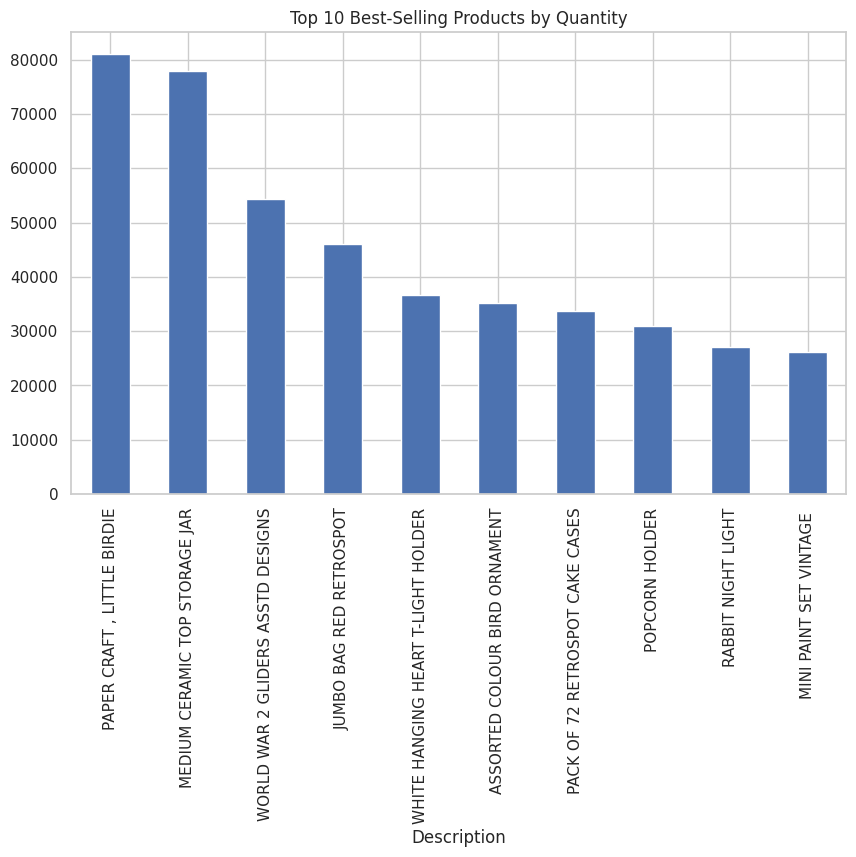

In [20]:
best_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

#Viz
best_selling_products.plot(kind='bar', figsize=(10,6), title="Top 10 Best-Selling Products by Quantity")
plt.show()

 2.   Total revenue generated by each product (displaying 10 products)

 PAPER CRAFT, LITTLE BIRDIE is the highest-revenue-generating product, followed by REGENCY CAKESTAND 3 TIER and WHITE HANGING HEART T-LIGHT HOLDER.
There is a significant drop in revenue from the top three products to the fourth, JUMBO BAG RED RETROSPOT.
The remaining products generate relatively similar revenue, ranging from approximately 50,000 to 100,000 units.
POSTAGE and PARTY BUNTING appear to be the next most popular products in terms of revenue after the top three.
Manual and RABBIT NIGHT LIGHT are the least revenue-generating products among the top 10.
Overall, the chart suggests that there is a wide range in the revenue generated by the products, with some items significantly outperforming others.




Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalSales, dtype: float64


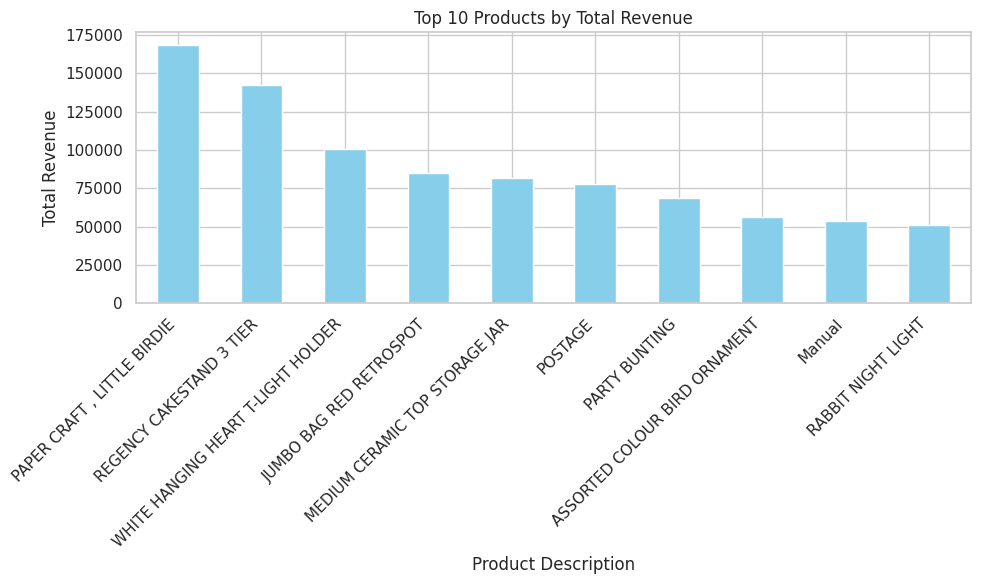

In [54]:
df['Total Revenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
print(product_revenue.head(10))

#viz
top_10_products = product_revenue.head(10)
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Total Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Description")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3.   Monthly revenue trend

The revenue fluctuated throughout the year, with both increases and decreases.
The highest revenue was recorded in December, followed by November  and October .
The lowest revenue was recorded in February  and April .
There was a general upward trend in revenue from the beginning of the year until November , followed by a sharp decline in December .
The months of March, April, and May  saw a significant decrease in revenue.
The revenue increased steadily from August to October .
Overall, the chart suggests that the company's revenue was not consistent throughout the year and was influenced by various factors. While there was a general upward trend, there were also periods of decline, indicating that the company faced challenges in maintaining a steady revenue stream.



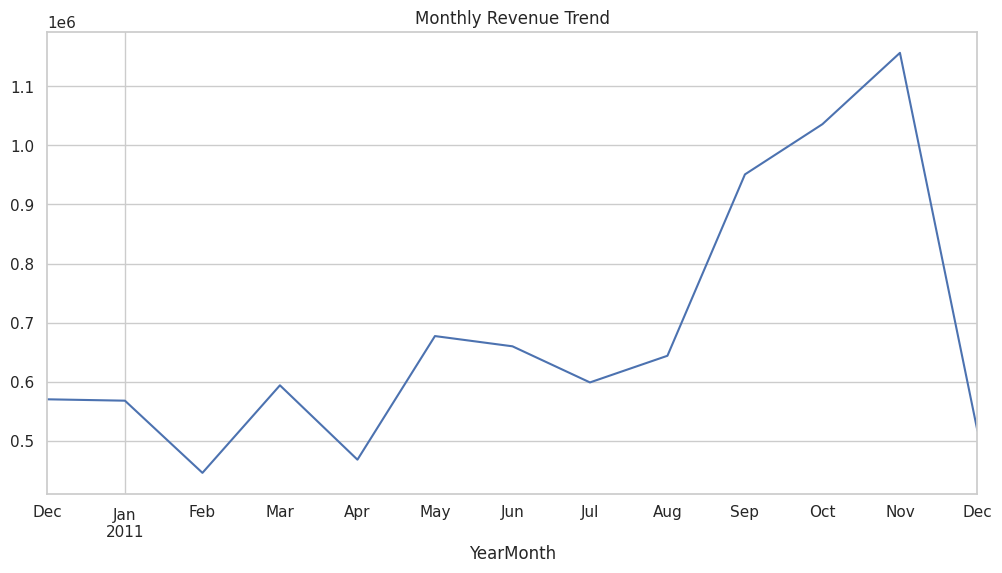

In [27]:
monthly_revenue = df.groupby('YearMonth')['TotalSales'].sum()

#viz
monthly_revenue.plot(kind='line', figsize=(12,6), title="Monthly Revenue Trend")
plt.show()


# Customer Behaviour



1.   One-time customers and percentage of sales from repeat customers

The vast majority of customers (98.36%) are repeat customers. This indicates that the company has a strong customer retention rate and is successful in encouraging customers to make repeat purchases.
Only a small percentage of customers (1.64%) are one-time customers. This suggests that the company may need to focus on improving its customer acquisition strategies to attract new customers.
The company has a highly loyal customer base. Repeat customers are more likely to be satisfied with the products or services and are more likely to recommend the company to others.
Overall, the pie chart suggests that the company has a strong customer base with a high level of customer loyalty. However, there is room for improvement in attracting new customers. The company may need to focus on improving its marketing efforts, customer service, and product offerings to attract more one-time customers and convert them into repeat customers.



Total number of customers: 4338
Number of one-time customers: 71
Number of repeat customers: 4267
Repeat customers account for 98.36% of total customers.


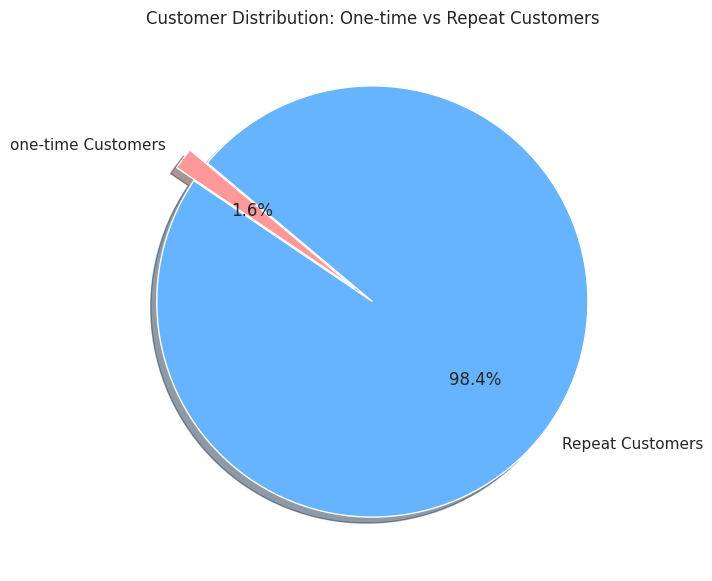

In [78]:
total_customers = df['CustomerID'].nunique()
customer_orders = df.groupby('CustomerID').size()
one_time_customers = customer_orders[customer_orders == 1].count()
repeat_customers = customer_orders[customer_orders > 1].count()

repeat_percentage = (repeat_customers / total_customers) * 100

print(f"Total number of customers: {total_customers}")
print(f"Number of one-time customers: {one_time_customers}")
print(f"Number of repeat customers: {repeat_customers}")
print(f"Repeat customers account for {repeat_percentage:.2f}% of total customers.")

#viz
labels = ['one-time Customers', 'Repeat Customers']
sizes = [one_time_customers, repeat_customers]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Distribution: One-time vs Repeat Customers')
plt.show()


2. Average order value and variation across customer segments

Netherlands has the highest average order value, followed by Japan and Singapore.
There is a significant drop in average order value from the top three countries to the fourth, Denmark.
The majority of countries have an average order value between 20 and 40.
Lebanon and Brazil have the lowest average order values.
There are several countries with similar average order values, including United Arab Emirates, Israel, Austria, Germany, France, and Spain.
Overall, the chart suggests that there is a wide range in the average order value across different countries. While some countries have significantly higher average order values than others, there are also several countries with similar values. This may indicate that factors such as pricing strategies, product offerings, and customer purchasing behavior vary across different regions.

Average order value (total sales per invoice): 479.56016047917126


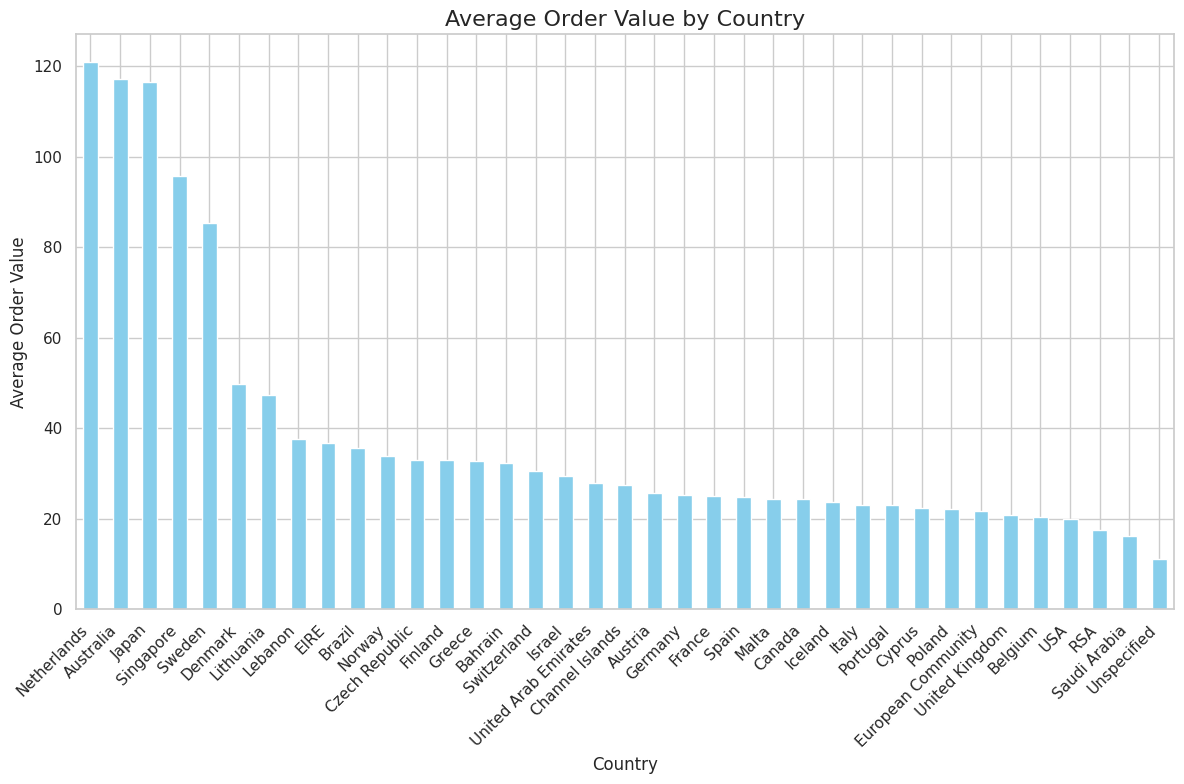

In [86]:
invoice_revenue = df.groupby('InvoiceNo')['TotalSales'].sum()
avg_order_value = invoice_revenue.mean()
print('Average order value (total sales per invoice):', avg_order_value)

country_order_value = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
country_order_value.plot(kind='bar', color='skyblue')

plt.title('Average Order Value by Country', fontsize=16)
plt.ylabel('Average Order Value', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

3. Countries contributing most to sales revenue

The United Kingdom is the country that contributes the most to sales revenue, with a significantly higher value compared to the other countries.
Netherlands, EIRE, Germany, and France have relatively similar sales revenue, with values ranging from approximately 0 to 1 million.
There is a significant gap between the United Kingdom and the other countries in terms of sales revenue.
Overall, the chart suggests that the United Kingdom is the dominant market for the company, contributing the majority of its sales revenue. While the other countries also contribute to sales, their contribution is relatively small compared to the United Kingdom.

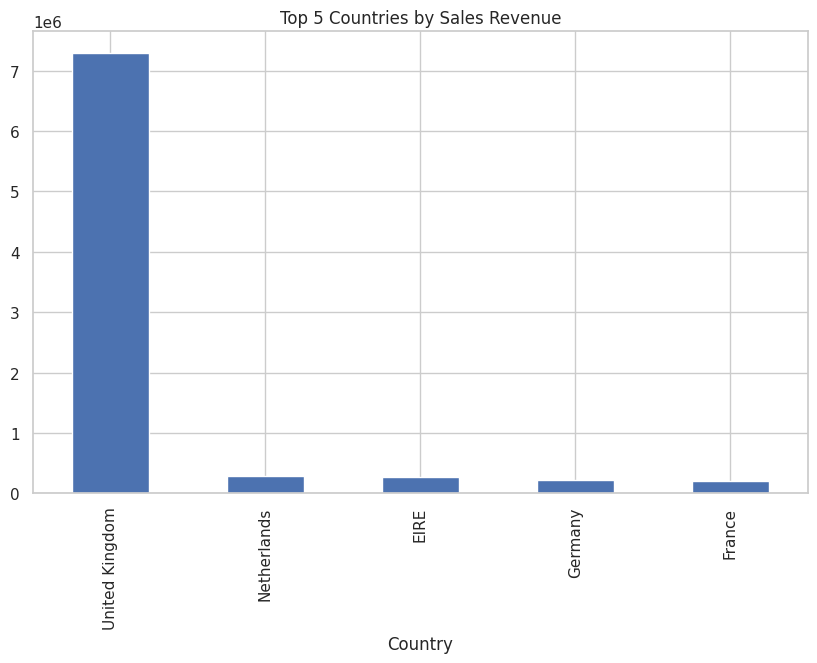

In [44]:
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_revenue.head(5).plot(kind='bar', figsize=(10,6), title="Top 5 Countries by Sales Revenue")
plt.show()

# Product Performance

1. Top 5 countries with the highest average revenue per transaction

Netherlands has the highest average revenue per transaction, followed by Australia and Japan.
Singapore and Sweden have lower average revenue per transaction compared to the top three countries.
There is a relatively small difference in average revenue per transaction between the top three countries.
Overall, the chart suggests that while there are variations in average revenue per transaction across the top 5 countries, the differences are not significant. This may indicate that factors such as pricing strategies, product offerings, and customer purchasing behavior are similar across these countries.

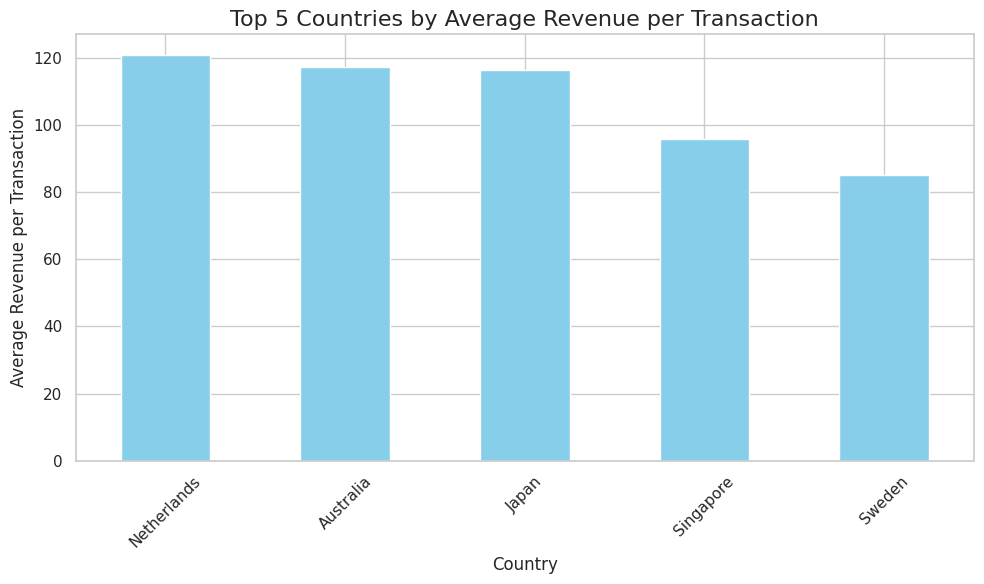

In [82]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
avg_revenue_per_transaction = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)
top_5_countries = avg_revenue_per_transaction.head(5)

#viz
plt.figure(figsize=(10,6))
top_5_countries.plot(kind='bar', color='skyblue')

plt.title('Top 5 Countries by Average Revenue per Transaction', fontsize=16)
plt.ylabel('Average Revenue per Transaction', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

2. products performance specific months or seasons

Product 22423 consistently dominates the sales in most months, indicating its popularity or effectiveness.
Product 23084 also shows strong performance throughout the year, though not as consistently as 22423.
Product 23166 experiences significant fluctuations in sales, with some months seeing high sales and others seeing low sales.
Product 85099B shows a steady increase in sales over the year, suggesting growing popularity or successful marketing efforts.
Product 85123A has a relatively stable sales performance throughout the year.
The remaining products exhibit varying levels of sales performance, with some showing peaks and troughs while others remain relatively consistent.
Overall, the chart suggests that the top 10 products have varying levels of popularity and sales performance throughout the year. While some products consistently dominate the market, others experience fluctuations or steady growth. This information can be valuable for businesses in understanding customer preferences, identifying successful products, and making informed marketing and sales decisions.










<Figure size 1200x800 with 0 Axes>

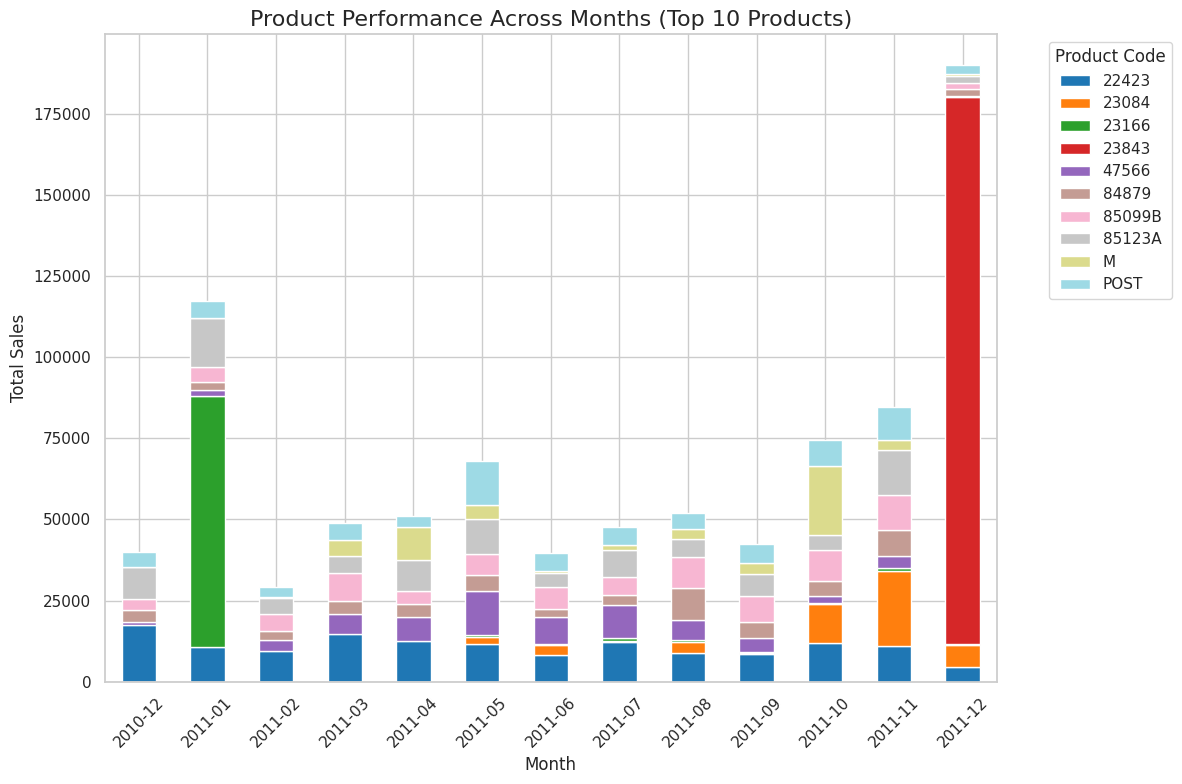

In [88]:
top_products = df.groupby('StockCode')['TotalSales'].sum().nlargest(10).index
filtered_data = df[df['StockCode'].isin(top_products)]
product_performance_by_month = filtered_data.groupby(['StockCode', 'YearMonth'])['TotalSales'].sum().unstack().fillna(0)
plt.figure(figsize=(12,8))

product_performance_by_month.T.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Product Performance Across Months (Top 10 Products)', fontsize=16)
plt.ylabel('Total Sales', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **In conclusion, the analysis of the provided charts reveals that the company has a strong customer base, with a focus on repeat customers. Certain products consistently outperform others, and there are significant geographic variations in sales performance. By leveraging top-performing products, understanding customer preferences, and adapting strategies to specific regions, the company can enhance its market position and achieve sustainable growth.**